In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
path='C:/Users/Asus/OneDrive/Desktop/python project/ML projects/data.csv'
titanic_data=pd.read_csv(path)

In [3]:
titanic_data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print('No. of passengers in titanic are', len(titanic_data))

No. of passengers in titanic are 891


## Analyzing Data

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


No. of passengers that survived: 549
No. of passengers that didnt survive: 342


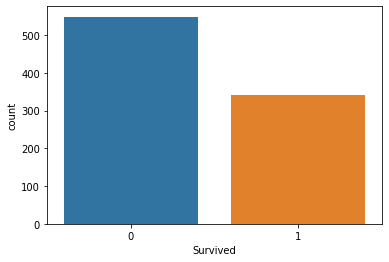

In [6]:
sns.countplot(x='Survived',data=titanic_data)
print('No. of passengers that survived:', len(titanic_data[titanic_data.Survived==0]))
print('No. of passengers that didnt survive:', len(titanic_data[titanic_data.Survived==1]))


<AxesSubplot:xlabel='Survived', ylabel='count'>

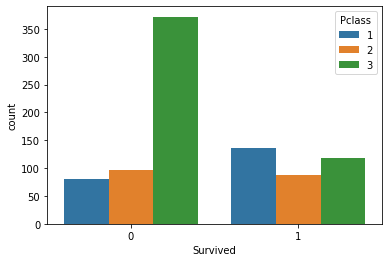

In [7]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

We can see that out of the passengers that didn't survive majority were from 3rd class. One reason could be that the 3rd class tickets would be farther down the deck and hence it would have been difficult for them to evacuate

<AxesSubplot:xlabel='Survived', ylabel='count'>

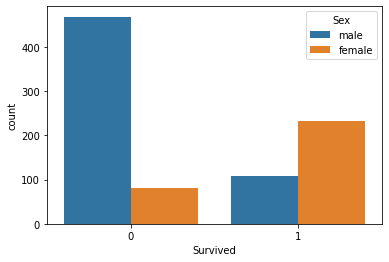

In [8]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)   

Since women and children were given priority while rescuing so the number of women which survived were more than men

<AxesSubplot:ylabel='Frequency'>

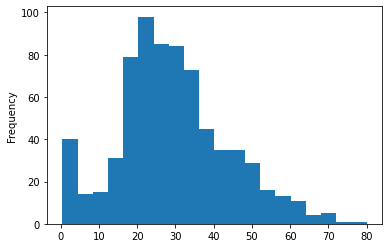

In [9]:
titanic_data['Age'].plot.hist(bins=20)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

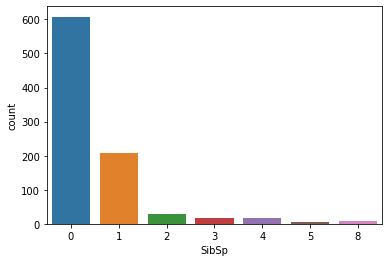

In [10]:
sns.countplot(x='SibSp',data=titanic_data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

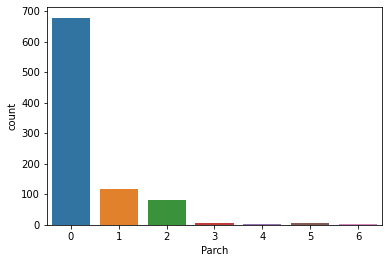

In [11]:
sns.countplot(x='Parch',data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

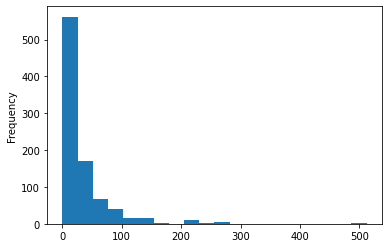

In [12]:
titanic_data['Fare'].plot.hist(bins=20)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

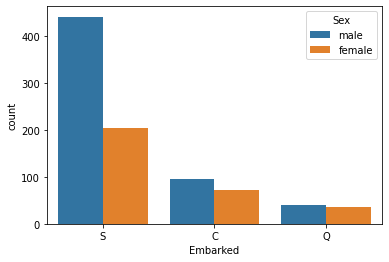

In [13]:
sns.countplot(x='Embarked',hue='Sex',data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

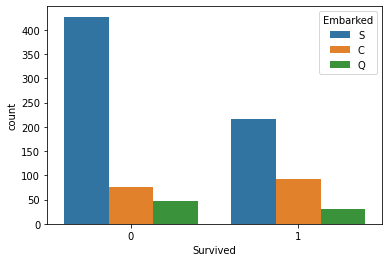

In [14]:
sns.countplot(x='Survived',hue='Embarked',data=titanic_data)

We can clearly see that the people embarking from Southampton were more than Cherbourg and Queenstown. Hence they make up for majority of the population in both cases(survived and didn't survive)

## Data Wrangling

In [15]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

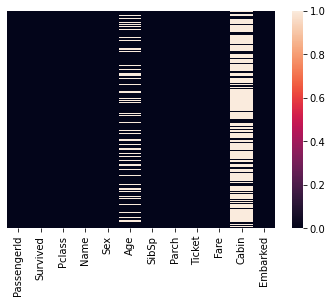

In [16]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

## Imputation


#### Replacing the null values in Age Column with Mean

In [17]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

#### Replacing the null values in Embarked Column with Mode

In [18]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode(),inplace=True)

#### Dropping the Cabin column as there are a lot of missing values

In [19]:
titanic_data.drop(['Cabin'],axis=1,inplace=True)

In [20]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<AxesSubplot:>

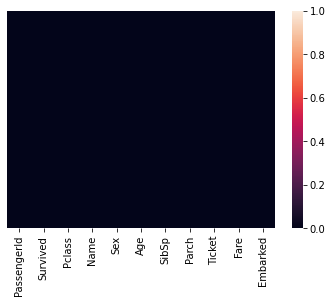

In [21]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

In [22]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Dropping PassengerID, Name, Ticket

In [23]:
titanic_data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [24]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Creating Dummies for Sex, Pclass and Embarked

In [25]:
titanic_data=pd.get_dummies(titanic_data,columns=['Pclass','Sex','Embarked'],drop_first=True)

In [26]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


### Checking For Multicollinearity

In [27]:
X=titanic_data.iloc[:,1:]

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["features"]=X.columns
vif

,VIF Factor,features
0,4.435508,Age
1,1.567252,SibSp
2,1.626185,Parch
3,1.828026,Fare
4,1.941489,Pclass_2
5,3.758953,Pclass_3
6,3.050547,Sex_male
7,1.576485,Embarked_Q
8,4.837211,Embarked_S


 ##### Since VIF <10 there is no multicollinearity in the data

<AxesSubplot:>

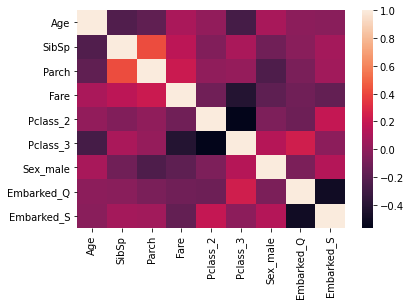

In [29]:
sns.heatmap(X.corr())

In [30]:
X.corr()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
Age,1.000000,-0.232625,-0.179191,0.091566,0.006589,-0.281004,0.084153,-0.013855,-0.027121
SibSp,-0.232625,1.000000,0.414838,0.159651,-0.055932,0.092548,-0.114631,-0.026354,0.070941
Parch,-0.179191,0.414838,1.000000,0.216225,-0.000734,0.015790,-0.245489,-0.081228,0.063036
Fare,0.091566,0.159651,0.216225,1.000000,-0.118557,-0.413333,-0.182333,-0.117216,-0.166603
Pclass_2,0.006589,-0.055932,-0.000734,-0.118557,1.000000,-0.565210,-0.064746,-0.127301,0.192061
Pclass_3,-0.281004,0.092548,0.015790,-0.413333,-0.565210,1.000000,0.137143,0.237449,-0.009511
Sex_male,0.084153,-0.114631,-0.245489,-0.182333,-0.064746,0.137143,1.000000,-0.074115,0.125722
Embarked_Q,-0.013855,-0.026354,-0.081228,-0.117216,-0.127301,0.237449,-0.074115,1.000000,-0.496624
Embarked_S,-0.027121,0.070941,0.063036,-0.166603,0.192061,-0.009511,0.125722,-0.496624,1.000000


### Splitting data into train and test

In [31]:
 from sklearn.model_selection import train_test_split
    

In [32]:
X=titanic_data.iloc[:,1:]
y=titanic_data.iloc[:,0]

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

### Fitting the model using Logisitic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [35]:
log=LogisticRegression(max_iter=1000)

In [36]:
log.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [37]:
cross_val_score(log,X_train,y_train,cv=5).mean()

0.8105677419354838

In [38]:
y_pred=log.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_pred,y_test)

0.7761194029850746

In [41]:
from sklearn.metrics import plot_confusion_matrix


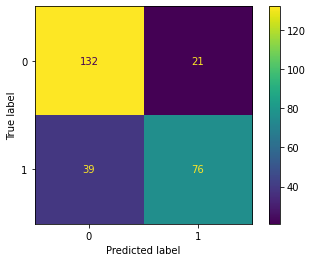

In [42]:
plot_confusion_matrix(log,X_test,y_test)


In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       171
           1       0.66      0.78      0.72        97

    accuracy                           0.78       268
   macro avg       0.76      0.78      0.77       268
weighted avg       0.79      0.78      0.78       268



### Testing the Accuracy using Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
clf=DecisionTreeClassifier()

In [47]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
cross_val_score(clf,X_train,y_train,cv=5).mean()

0.7720387096774193

In [49]:
y_pred1=clf.predict(X_test)

In [50]:
accuracy_score(y_pred1,y_test)

0.7350746268656716

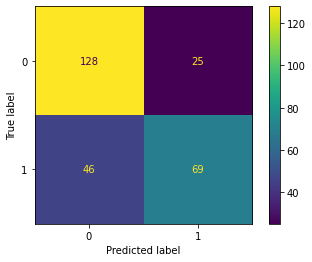

In [51]:
plot_confusion_matrix(clf,X_test,y_test)

In [52]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.84      0.74      0.78       174
           1       0.60      0.73      0.66        94

    accuracy                           0.74       268
   macro avg       0.72      0.73      0.72       268
weighted avg       0.75      0.74      0.74       268



### Testing the Accuracy using K Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn=KNeighborsClassifier(n_neighbors=8)


In [55]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [56]:
cross_val_score(knn,X_train,y_train,cv=5).mean()

0.6854064516129033

In [57]:
y_pred2=knn.predict(X_test)

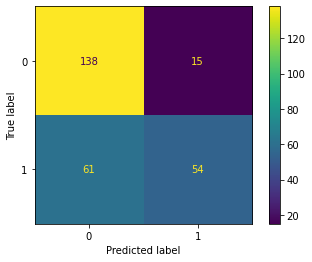

In [58]:
plot_confusion_matrix(knn,X_test,y_test)

In [59]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78       199
           1       0.47      0.78      0.59        69

    accuracy                           0.72       268
   macro avg       0.69      0.74      0.69       268
weighted avg       0.79      0.72      0.73       268



In [60]:
accuracy_score(y_pred2,y_test)

0.7164179104477612

#### For this data Logistic Regression performs better with a cross_val_score of  0.81 

## Loading the testing dataset


In [61]:
test_data_raw=pd.read_csv('C:/Users/Asus/OneDrive/Desktop/python project/ML projects/test_data.csv')
test_data=test_data_raw.copy()

In [62]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Removing columns like PassengerId, Name,Ticket,Cabin

In [63]:
test_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [64]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [65]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


### Checking for null values

In [66]:
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

<AxesSubplot:>

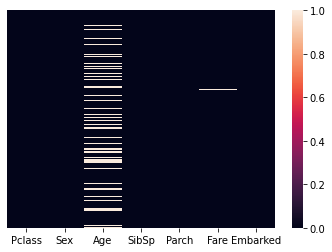

In [67]:
sns.heatmap(test_data.isnull(),yticklabels=False)

### Replacing Nan values in Age and Fare with their Mean

In [68]:
mean_age=test_data.Age.mean()
test_data['Age'].fillna(mean_age,inplace=True)


In [69]:
mean_fare=test_data.Fare.mean()
test_data['Fare'].fillna(mean_fare,inplace=True)

In [70]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Creating Dummies for Pclass, Sex and Embarked

In [71]:
test_data=pd.get_dummies(test_data,columns=['Pclass','Sex','Embarked'],drop_first=True)

In [72]:
test_data.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,1,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,1


### Predicting the Survival using Logistic Regression

In [73]:
prediction=log.predict(test_data)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [74]:
prediction=pd.DataFrame(prediction)
prediction.rename(columns={0:'Survived'},inplace=True)

In [75]:
test_data_raw

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [76]:
final_data=pd.concat([test_data_raw,prediction],axis=1)

In [77]:
final_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


### Passenger ID and Survived

In [78]:
submission_data=final_data[['PassengerId','Survived']]
submission_data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### Saving the file as csv

In [79]:
Submission=submission_data.to_csv('Submission.csv')